# Analysis of JLab 12 GeV pseudodata.

In [1]:
#!/usr/bin/env python
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from tools import save, load, lprint, checkdir

from plottools import above, below, left, right, plotJLab12, custom_label, color_plot, color_plot_hull

#--matplotlib
import matplotlib
matplotlib.use('PS')
matplotlib.rc('text',usetex=True)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.lines import Line2D
import pylab as py
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

import matplotlib.gridspec as gridspec
%matplotlib inline

My calculations of ranges in Rs:

We open file  expdata/jlab12.xlsx
1399/1400

 R0max = 0.8815680990066935, R0min = 3.1253115881461068e-09

 R1max = 301995.8541897907, R1min = 0.0016739607762460403

 R2max = 153.18602191438097, R2min = 0.002439468553573263

 R3max = 230.59851749226343, R3min = 1.4615151954597949e-09

 R4max = 198.35998094848298, R4min = 1.4764580100772627e-08

 R1pmax = 9.31112136501656, R1pmin = 0.09164903554162183
 
We write otput into a file  data/jlab12.xlsx


**Usage**

Any affinity index, such as tmd-aff  correspond tto different a way of generating np parameters:
in the bounds lower,upper=0.0,0.938
    

    

# Let us perform analysis of the regions indicators Rs

In [2]:
fname = '/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/data/CLAS12_1400affinity_1400_events0.3.xlsx'
data=pd.read_excel(fname)

In [3]:
np.max(data.R2)

8.65770310855708

In [4]:
data.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'x', 'z', 'Q2', 'pT', 'target', 'hadron',
       'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff', 'collinearaff',
       'collinearloworderaff', 'collinearhighorderaff', 'matchaff', 'softaff',
       'targetaff', 'unclassifiedaff', 'R0', 'R1', 'R1p', 'R2', 'R3', 'R4',
       'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget', 'yi', 'yf'],
      dtype='object')

In [5]:
data["Q"]=np.sqrt(data["Q2"])
data["qToverQ"] = data["qT"]/data["Q"]

In [6]:
dataVladimirov = data.query("Q2>=4 and qT/Q<=0.25")
print("Length Vladimirov",len(dataVladimirov))
print("Max affinity Vladimirov",max(dataVladimirov.tmdaff))
print("Min affinity Vladimirov",min(dataVladimirov.tmdaff))
cut = 0.68
msg = "tmdaff>"+str(cut)
dataAff = data.query(msg)
print("Length Aff>",cut,"=",len(dataAff))
print("Length Aff not in Vladimirov",len(dataAff.query("Q2<4 or qT/Q>0.25")))

Length Vladimirov 35
Max affinity Vladimirov 0.7587999999999328
Min affinity Vladimirov 0.2238999999999917
Length Aff> 0.68 = 7
Length Aff not in Vladimirov 0


In [7]:
data["PaviapTcut"] = data.pT
for i in range(len(data)):
    data.PaviapTcut[i] = min(0.2*data.Q[i], 0.7*data.Q[i]*data.z[i])+0.5
dataPavia = data.query("Q2>=1.4 and 0.2 < z < 0.74 and pT<=PaviapTcut")
print("Length Pavia",len(dataPavia))
print("Max affinity Pavia",max(dataPavia.tmdaff))
print("Min affinity Pavia",min(dataPavia.tmdaff))

msg = "tmdaff>"+str(cut)
print("Length Pavia with Aff>",cut,"=",len(dataPavia.query(msg)))
dataAff = data.query(msg)
print("Length Aff>",cut,"=",len(dataAff))
print("Length Aff not in Pavia",len(dataAff.query("Q2<1.4 or 0.2 > z > 0.74 or pT>=PaviapTcut")))
print("Length Pavia not in Vladimirov",len(dataPavia.query("Q2<4 or qT/Q>0.25")))

Length Pavia 1146
Max affinity Pavia 0.7587999999999328
Min affinity Pavia 0.0
Length Pavia with Aff> 0.68 = 7
Length Aff> 0.68 = 7
Length Aff not in Pavia 0
Length Pavia not in Vladimirov 1114


In [8]:
dataJam = data.query("0.2<z<0.6 and Q2>1.63 and 0.2<pT<0.9")
print("Length Jam",len(dataJam))
print("Max affinity Jam",max(dataJam.tmdaff))
print("Min affinity Jam",min(dataJam.tmdaff))

msg = "tmdaff>"+str(cut)
dataAff = data.query(msg)
print("Length Jam with Aff>",cut,"=",len(dataJam.query(msg)))
print("Length Aff>",cut,"=",len(dataAff))
print("Length Aff not in Jam",len(dataAff.query("0.2>z or z>0.6 or Q2<1.63 or pT<0.2 or pT>0.9")))

Length Jam 782
Max affinity Jam 0.7518999999999335
Min affinity Jam 0.0
Length Jam with Aff> 0.68 = 3
Length Aff> 0.68 = 7
Length Aff not in Jam 4


In [9]:
dataTmd = data.query("tmdaff>0.05")
dataCollinear = data.query("collinearaff>0.05")
dataCollinearHigh = data.query("collinearhighorderaff>0.05")
dataCollinearLow = data.query("collinearloworderaff>0.05")
dataSoft = data.query("softaff>0.05")
dataTarget = data.query("targetaff>0.05")
dataUnclassified = data.query("unclassifiedaff>0.05")

print("Tmd=",len(dataTmd))
print("Collinear=",len(dataCollinear))
print("CollinearHigh=",len(dataCollinearHigh))
print("CollinearLow=",len(dataCollinearLow))


print("Soft=",len(dataSoft))
print("Target=",len(dataTarget))
print("Unclassified=",len(dataUnclassified))

Tmd= 621
Collinear= 722
CollinearHigh= 667
CollinearLow= 0
Soft= 1010
Target= 0
Unclassified= 1400


In [10]:
len(data)

1400

In [11]:
len(data.query("tmdaff>0.68"))

7

In [12]:
len(data.query("collinearaff>0.68"))

0

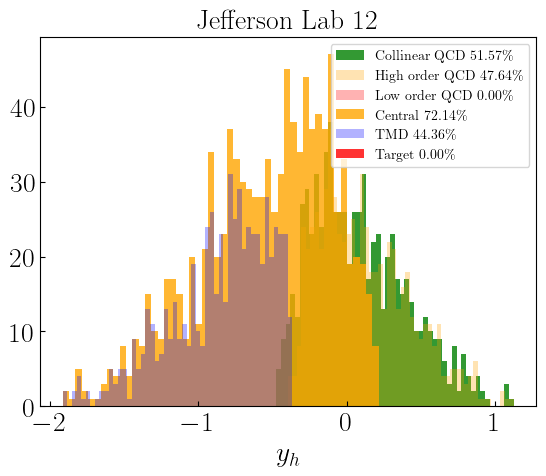

In [13]:
fig, ax = plt.subplots()


length=len(dataCollinear)/len(data)*100
string = 'Collinear QCD %.2f' % length
string = string + '\%'
plt.hist(dataCollinear.yh,histtype='stepfilled',  bins=50, alpha = 0.8,label=string,color="g",ec="g")

length=len(dataCollinearHigh)/len(data)*100
string = 'High order QCD %.2f' % length
string = string + '\%'
plt.hist(dataCollinearHigh.yh,histtype='stepfilled',  bins=50, alpha = 0.3,label=string,color="orange",ec="orange")

length=len(dataCollinearLow)/len(data)*100
string = 'Low order QCD %.2f' % length
string = string + '\%'
plt.hist(dataCollinearLow.yh,histtype='stepfilled',  bins=50, alpha = 0.3,label=string,color="r",ec="r")

length=len(dataSoft)/len(data)*100
string = 'Central %.2f' % length
string = string + '\%'
plt.hist(dataSoft.yh,histtype='stepfilled',  bins=50, alpha = 0.8,label=string,color="orange",ec="orange")

length=len(dataTmd)/len(data)*100
string = 'TMD %.2f' % length
string = string + '\%'
plt.hist(dataTmd.yh,histtype='stepfilled', bins=50, alpha = 0.3, label=string,color="b",ec="b")

length=len(dataTarget)/len(data)*100
string = 'Target %.2f' % length
string = string + '\%'
plt.hist(dataTarget.yhtarget,histtype='stepfilled',  bins=50, alpha = 0.8,label=string,color="r",ec="r")

ax.tick_params(axis='both', which='major', labelsize=20, direction='in')


ax.set_xlabel(r'$y_h$',size=20)

#plt.title('JLab 12',size = 20)
plt.title('Jefferson Lab 12',size = 20)


ax.legend(loc="upper right")
plt.savefig("./Figs/JLab12_data_y.pdf", bbox_inches='tight')
plt.show()

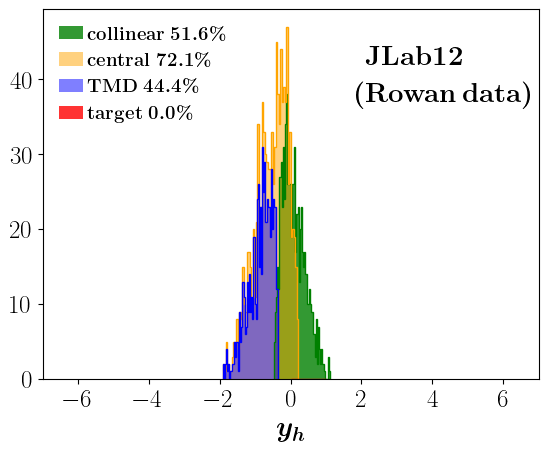

In [14]:
fig, ax = plt.subplots()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


length=len(dataCollinear)/len(data)*100
string = "\\boldmath{$\\rm collinear\\; %.1f" % length
string = string + "\% $}"
plt.hist(dataCollinear.yh,histtype='stepfilled',  bins=50, alpha = 0.8,label=string,color="g",ec="g")
plt.hist(dataCollinear.yh,histtype=u'step',  bins=50, alpha = 1,color="g",ec="g")



length=len(dataSoft)/len(data)*100
string = "\\boldmath{$\\rm central\\; %.1f" % length
string = string + "\% $}"

plt.hist(dataSoft.yh,histtype='stepfilled',  bins=50, alpha = 0.5,label=string,color="orange",ec="orange")
plt.hist(dataSoft.yh,histtype=u'step',  bins=50, alpha = 1,color="orange",ec="orange")


length=len(dataTmd)/len(data)*100
string = "\\boldmath{$\\rm TMD\\; %.1f" % length
string = string + "\% $}"

plt.hist(dataTmd.yh,histtype='stepfilled', bins=50, alpha = 0.5, label=string,color="b",ec="b")
plt.hist(dataTmd.yh,histtype=u'step', bins=50, alpha = 1,color="b",ec="b")


length=len(dataTarget)/len(data)*100
string = "\\boldmath{$\\rm target\\; %.1f" % length
string = string + "\% $}"

plt.hist(dataTarget.yhtarget,histtype='stepfilled',  bins=50, alpha = 0.8,label=string,color="r",ec="r")
plt.hist(dataTarget.yhtarget,histtype=u'step',  bins=50, alpha =1,color="r",ec="r")




ax.set_xlim([-7, 7])
ax.tick_params(axis='both', which='minor', labelsize=20, direction='in')


ax.set_xlabel(r'\boldmath{$y_h$}',size=20)

#plt.title('EIC',size = 20)
ax.text(0.65,0.85,r"\boldmath{$\rm JLab 12 $}",fontsize=20,transform=ax.transAxes)
ax.text(0.63,0.75,r"\boldmath{$\rm (Rowan \, data)$}",fontsize=20,transform=ax.transAxes)


ax.legend(loc="upper left",prop={"size":13.5},frameon=0,handletextpad=0.2,markerscale=2.,handlelength=1.25)
plt.savefig("./Figs/JLab12_Rowan_data_y.pdf", bbox_inches='tight')
plt.show()

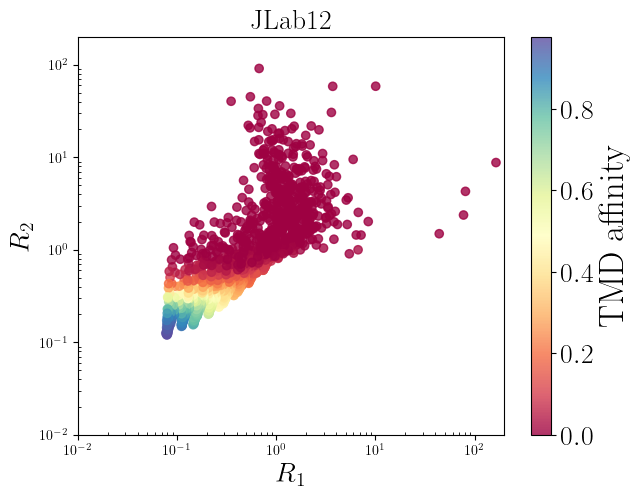

In [15]:
fig, ax, vert, hor = color_plot(data, "R2", "R1", cmap="Spectral", alpha=0.8, cbarshow = True)
ax.set_yscale("log")
ax.set_ylim([0.01, 200])
ax.set_xscale("log")
ax.set_xlim([0.01, 200])
#plt.axhline(0.5, 0, 0.4)
#plt.axvline(0.5, 0, 0.4)
plt.title("$\\rm JLab12$",size=20)

plt.savefig("./Figs/JLab12_data_R2_R1.pdf", bbox_inches='tight')
plt.show()

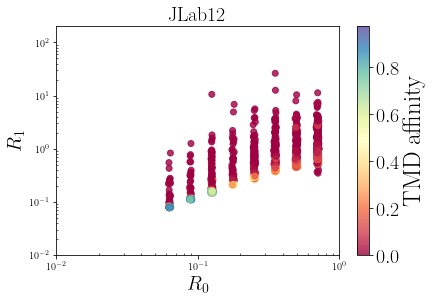

In [16]:
fig, ax, vert, hor = color_plot(data, "R1", "R0", cmap="Spectral", alpha=0.8, cbarshow = True)
ax.set_yscale("log")
ax.set_ylim([0.01, 200])
ax.set_xscale("log")
ax.set_xlim([0.01, 1])
#plt.axhline(0.5, 0, 0.56)
#plt.axvline(0.5, 0, 0.4)
plt.title("$\\rm JLab12$",size=20)

plt.savefig("./Figs/JLab12_data_R1_R0.pdf", bbox_inches='tight')
plt.show()

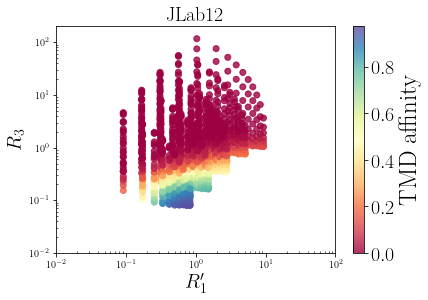

In [17]:
fig, ax, vert, hor = color_plot(data, "R3", "R1p", cmap="Spectral", alpha=0.8, cbarshow = True)
ax.set_yscale("log")
ax.set_ylim([0.01, 200])
ax.set_xscale("log")
ax.set_xlim([0.01, 100])
#plt.axhline(0.5, 0.49, 1)
#plt.axvline(0.5, 0, 0.34)
plt.title("$\\rm JLab12$",size=20)

plt.savefig("./Figs/JLab12_data_R3_R1p.pdf", bbox_inches='tight')
plt.show()

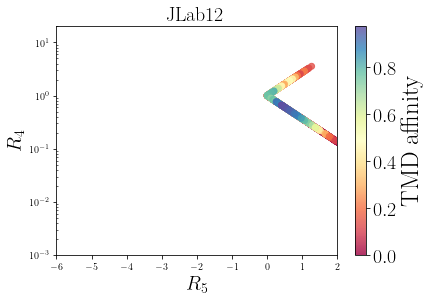

In [18]:
fig, ax, vert, hor = color_plot(data, "R4", "R5", cmap="Spectral", alpha=0.8, cbarshow = True)
ax.set_yscale("log")
ax.set_ylim([0.001, 20])
#ax.set_xscale("log")
ax.set_xlim([-6.01, 2])
#plt.axhline(0.5, 0, 0.34)
#plt.axvline(0.5, 0, 0.34)
plt.title("$\\rm JLab12$",size=20)

plt.savefig("./Figs/JLab12_data_R4_R5.pdf", bbox_inches='tight')
plt.show()

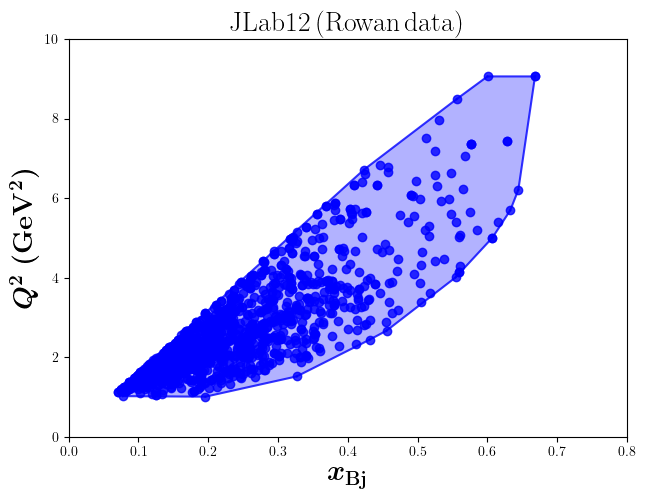

In [15]:
fig, ax, vert, hor = color_plot_hull(data, "Q2", "x", cmap="none", alpha=0.8)
# ax.set_yscale("log")
ax.set_ylim([0, 10])
# ax.set_xscale("log")
ax.set_xlim([0, 0.8])
plt.title("$\\rm JLab12 \, (Rowan \, data)$",size=20)
plt.savefig("./Figs/JLab12_kinematics_Rowan.pdf", bbox_inches='tight')
plt.show()

### TMD affinity

In [ ]:
plotJLab12(data ,hadron = 'pi+', affinity = 'tmdaff', plotx = 'qToverQ', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\
/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plotto

/Users/tetiana/Documents/Affinity/Clas12_and_Jlab12/plottools.py:360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=[3, -2.5], loc='center',fontsize=30,frameon=0\


In [ ]:
plotJLab12(data,hadron = 'pi+', affinity = 'tmdaff', plotx = 'pT', ploty = 'z',  cmap_name = 'Spectral', yscale = 'linear')

In [ ]:
len(data.query("tmdaff > 0.68"))

In [ ]:
len(data.query("tmdaff > 0.95"))

### "collinear" region of QCD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


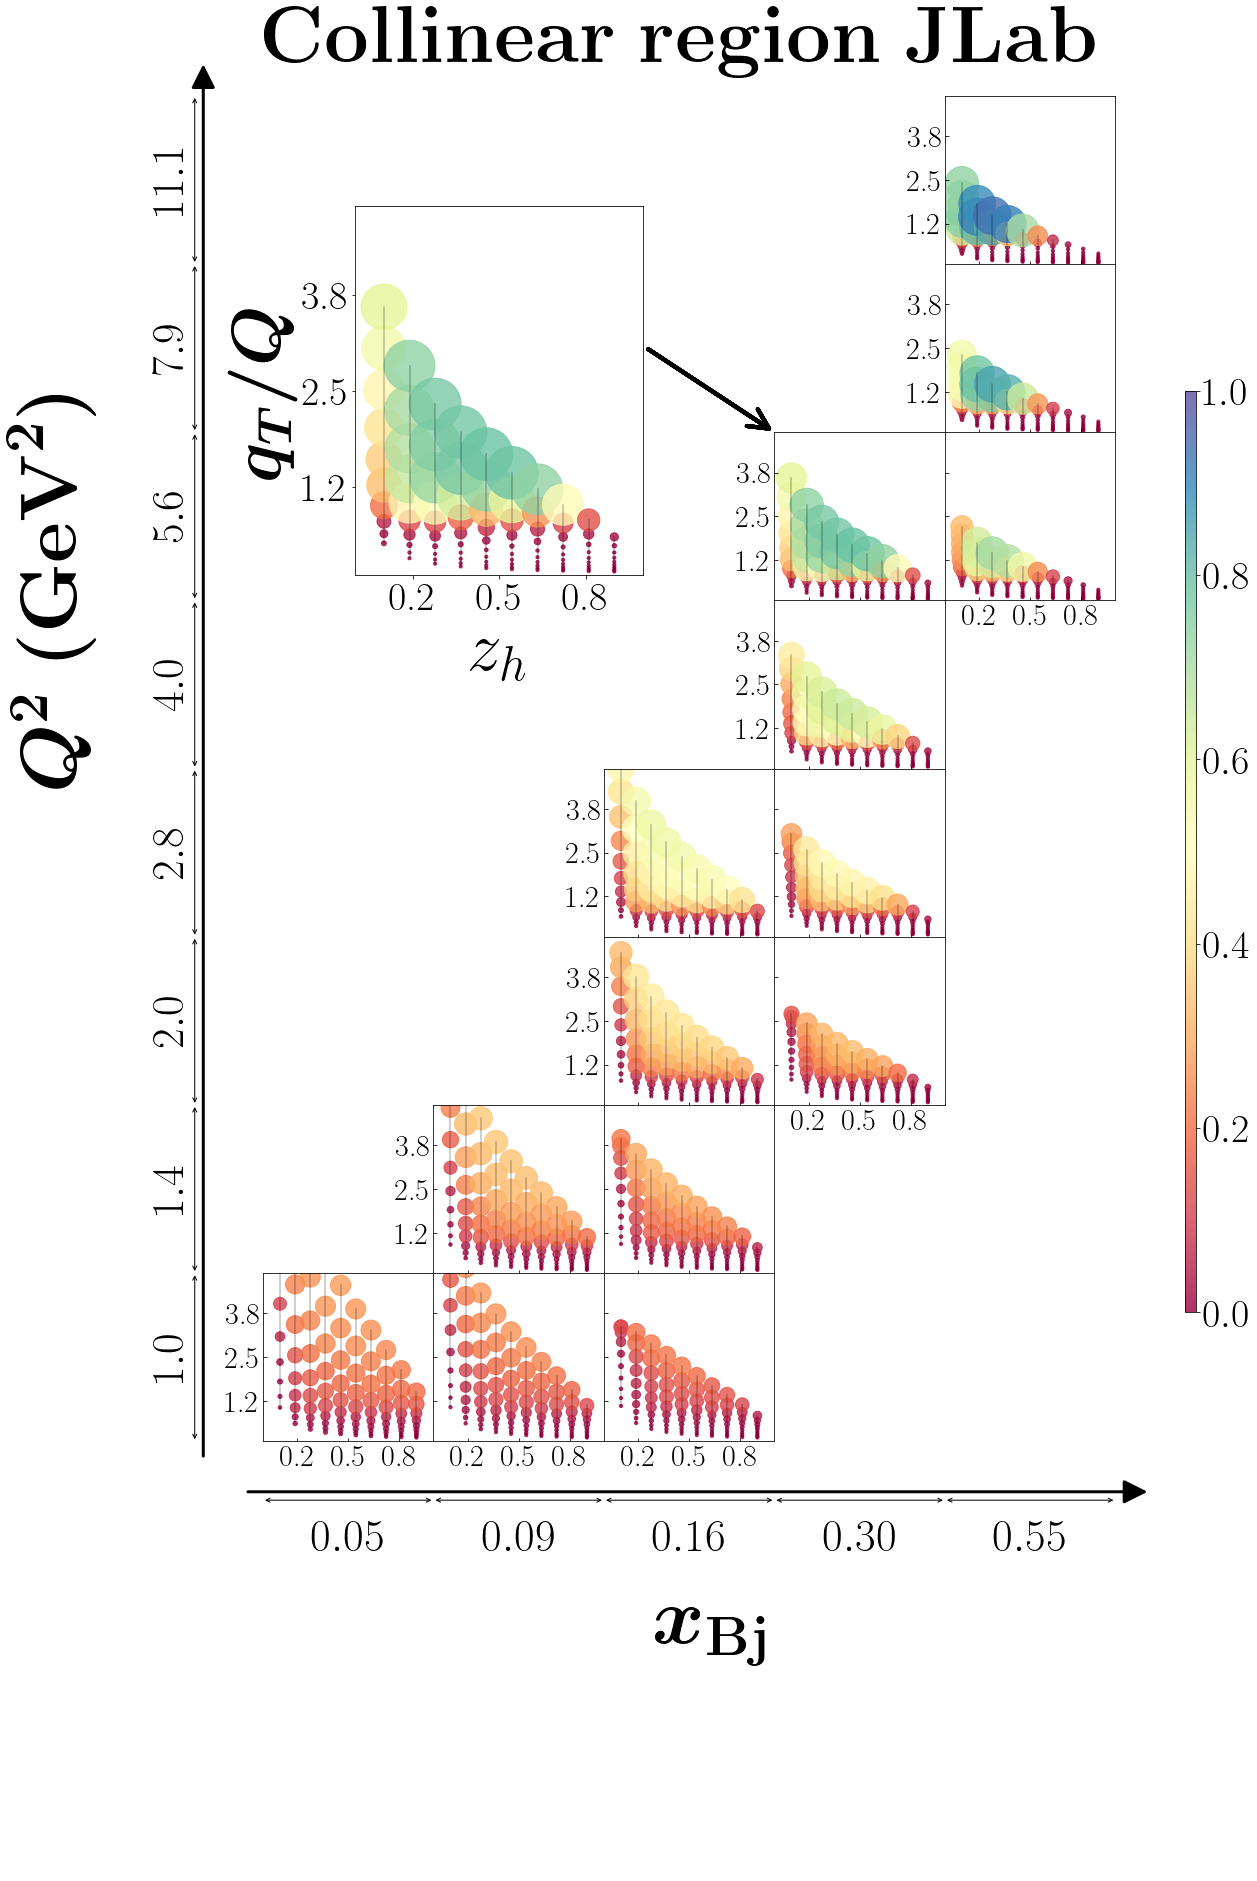

In [24]:
plotJLab12(data ,hadron = 'pi+', affinity = 'collinearaff', plotx = 'qToverQ', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


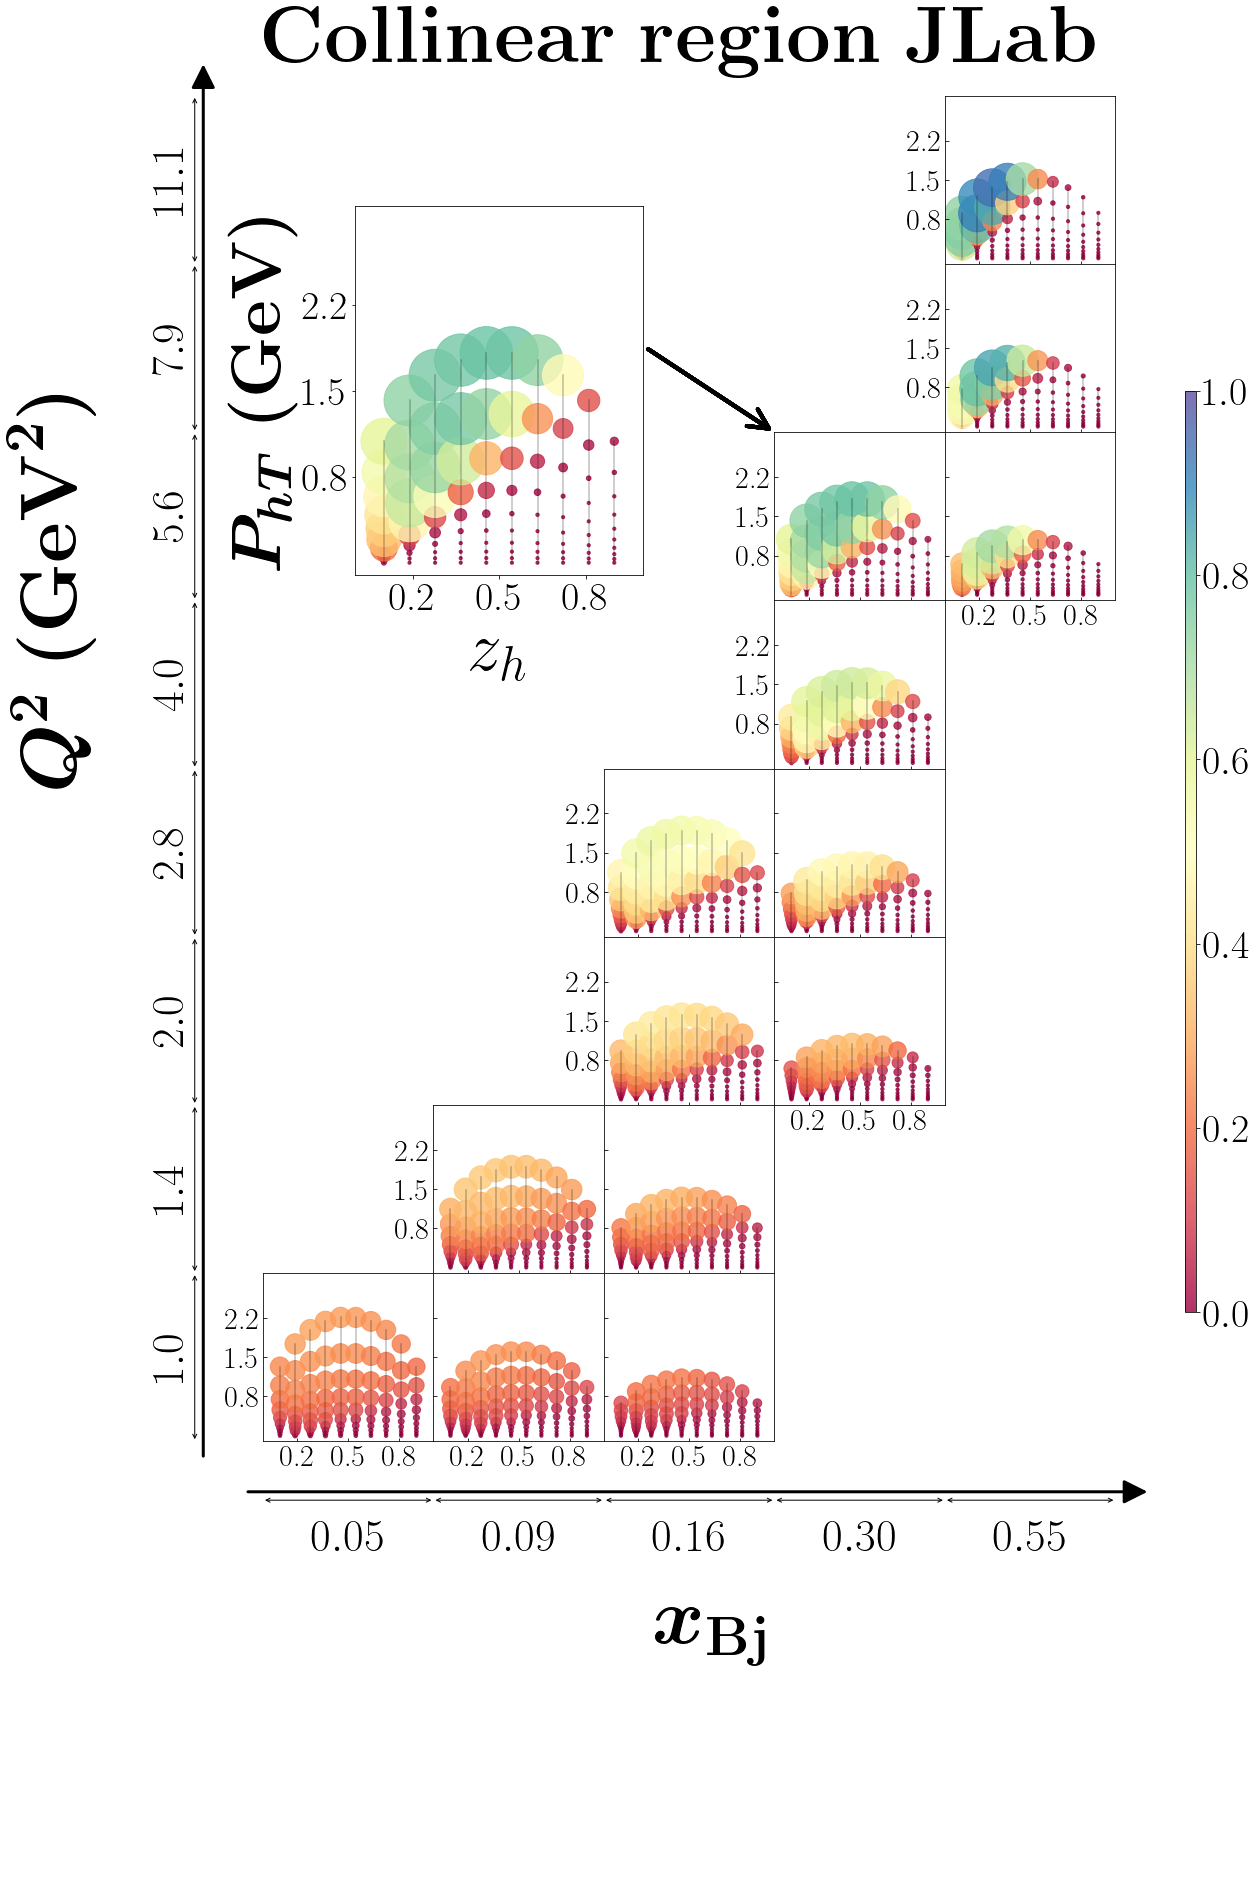

In [25]:
plotJLab12(data ,hadron = 'pi+', affinity = 'collinearaff', plotx = 'pT', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

In [26]:
len(data.query("collinearaff > 0.68"))

31

In [27]:
len(data.query("collinearaff > 0.95"))

0

### "collinear high order" region of QCD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


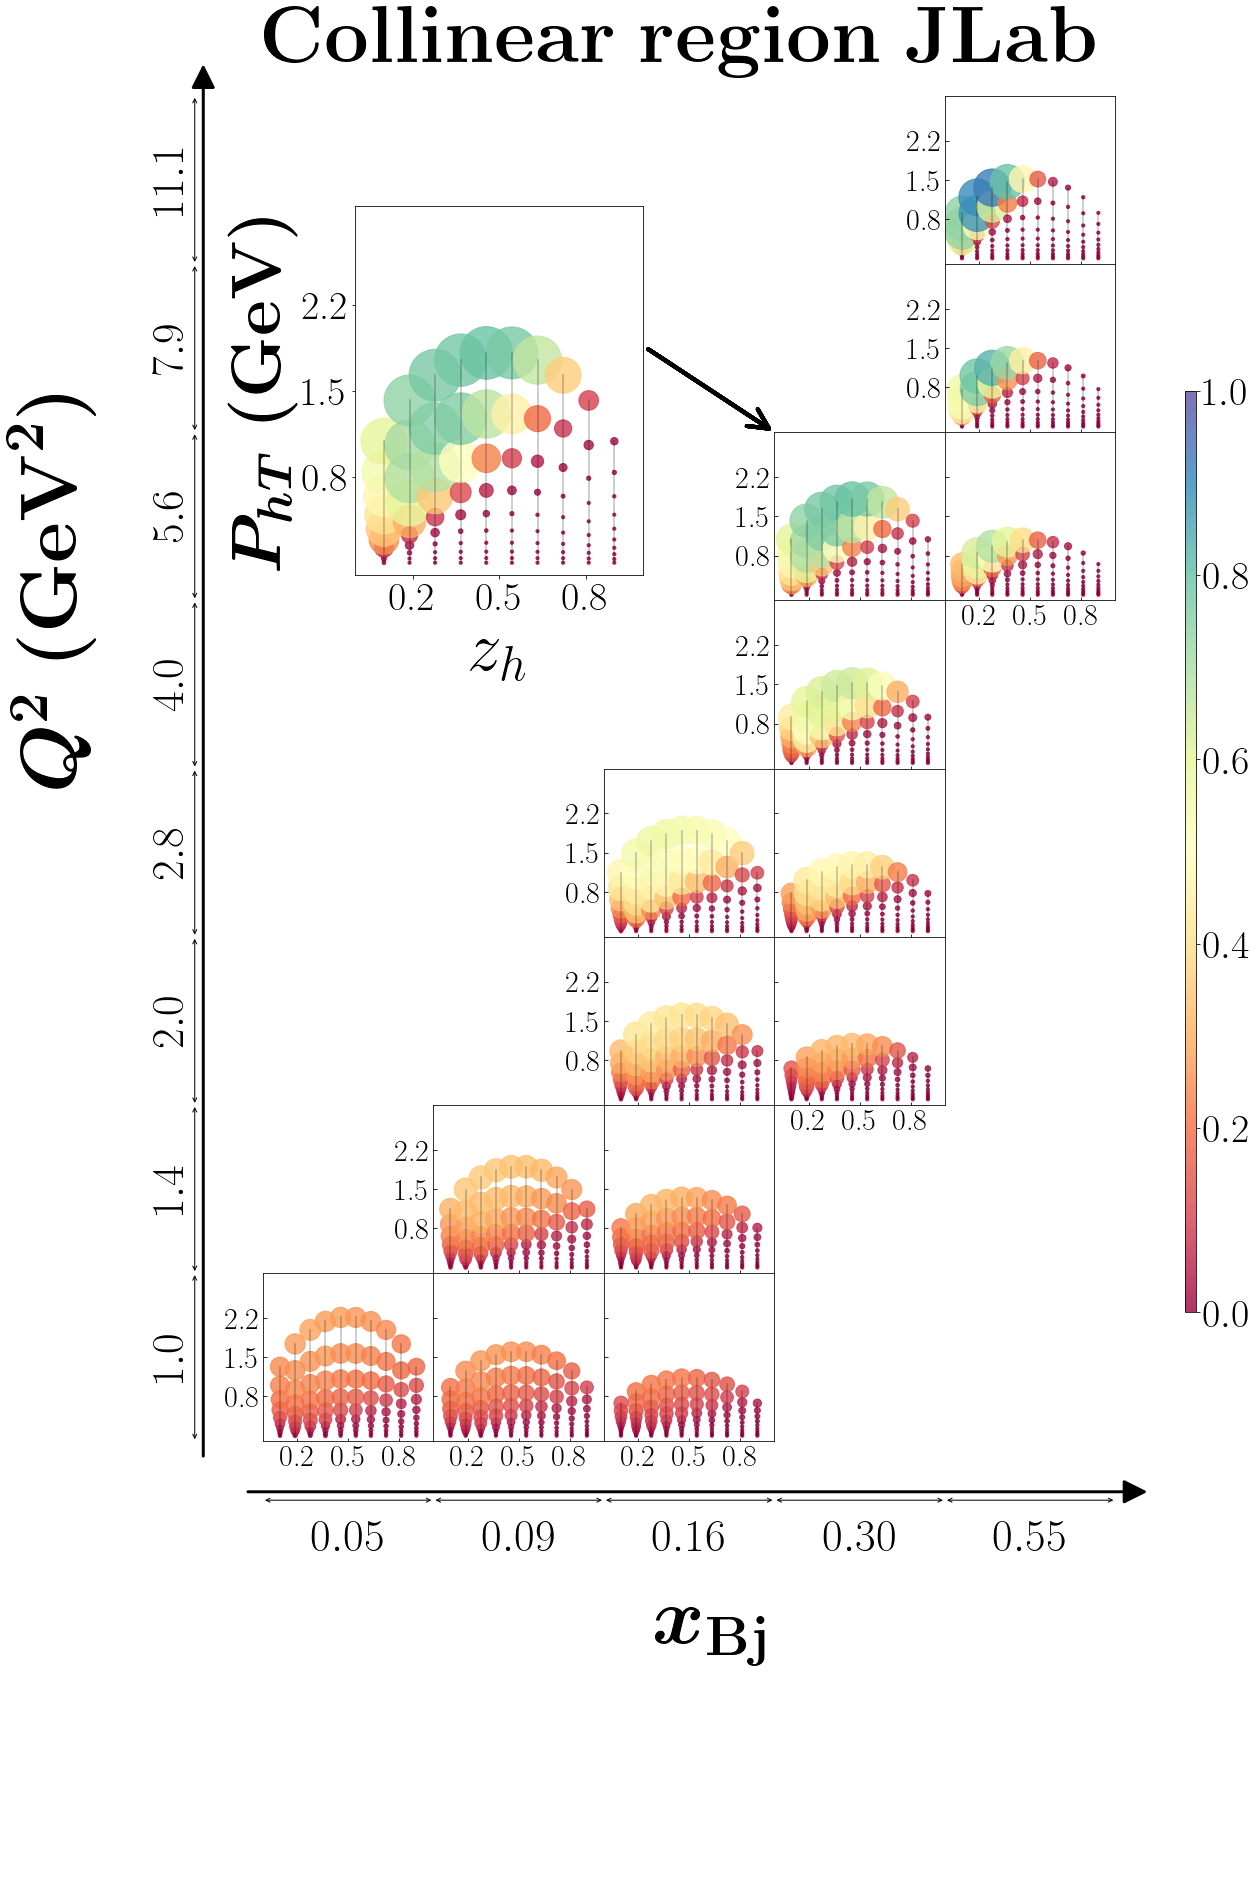

In [28]:
plotJLab12(data ,hadron = 'pi+', affinity = 'collinearhighorderaff', plotx = 'pT', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

### "matching" region 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


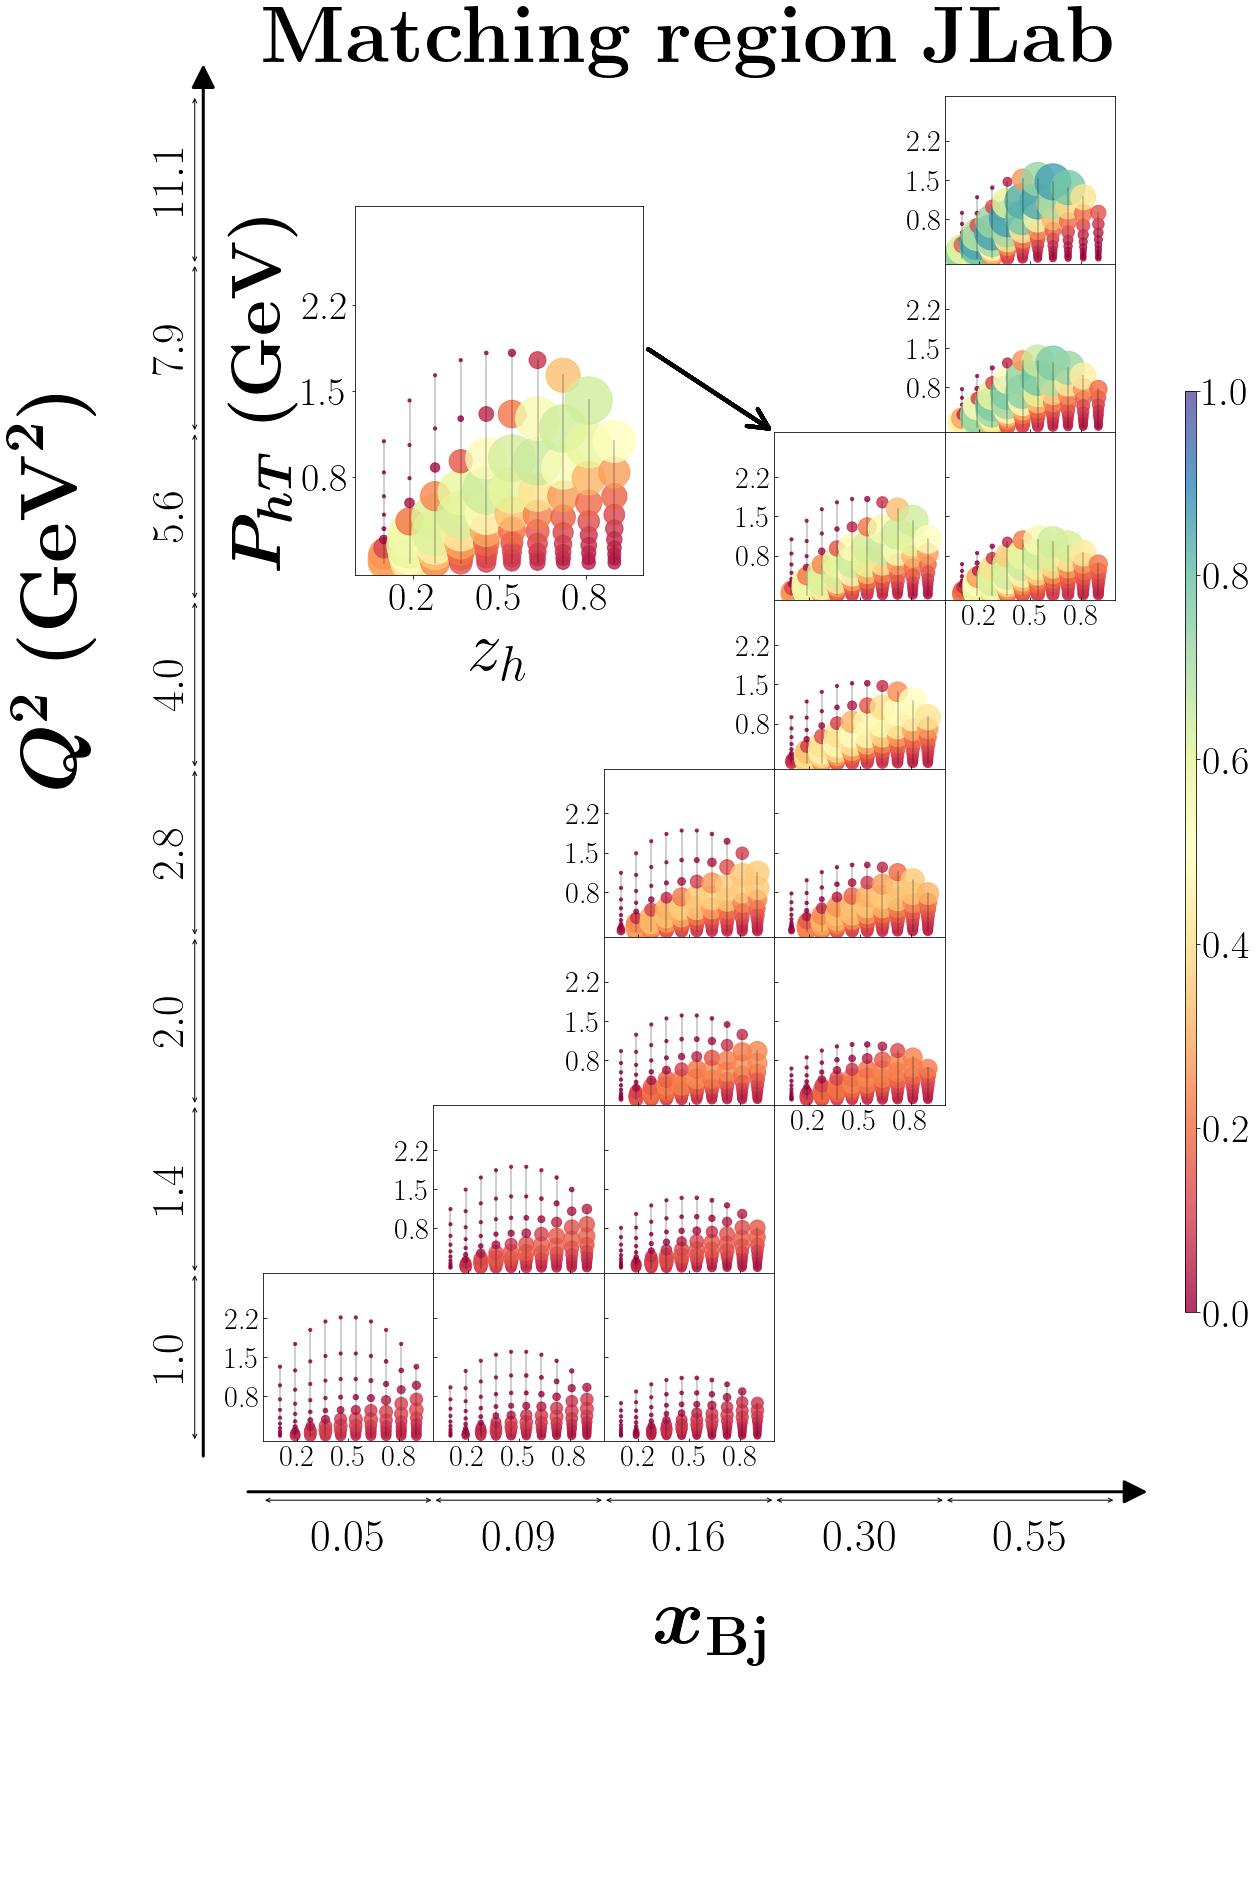

In [29]:
plotJLab12(data ,hadron = 'pi+', affinity = 'matchaff', plotx = 'pT', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

### "target" region 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


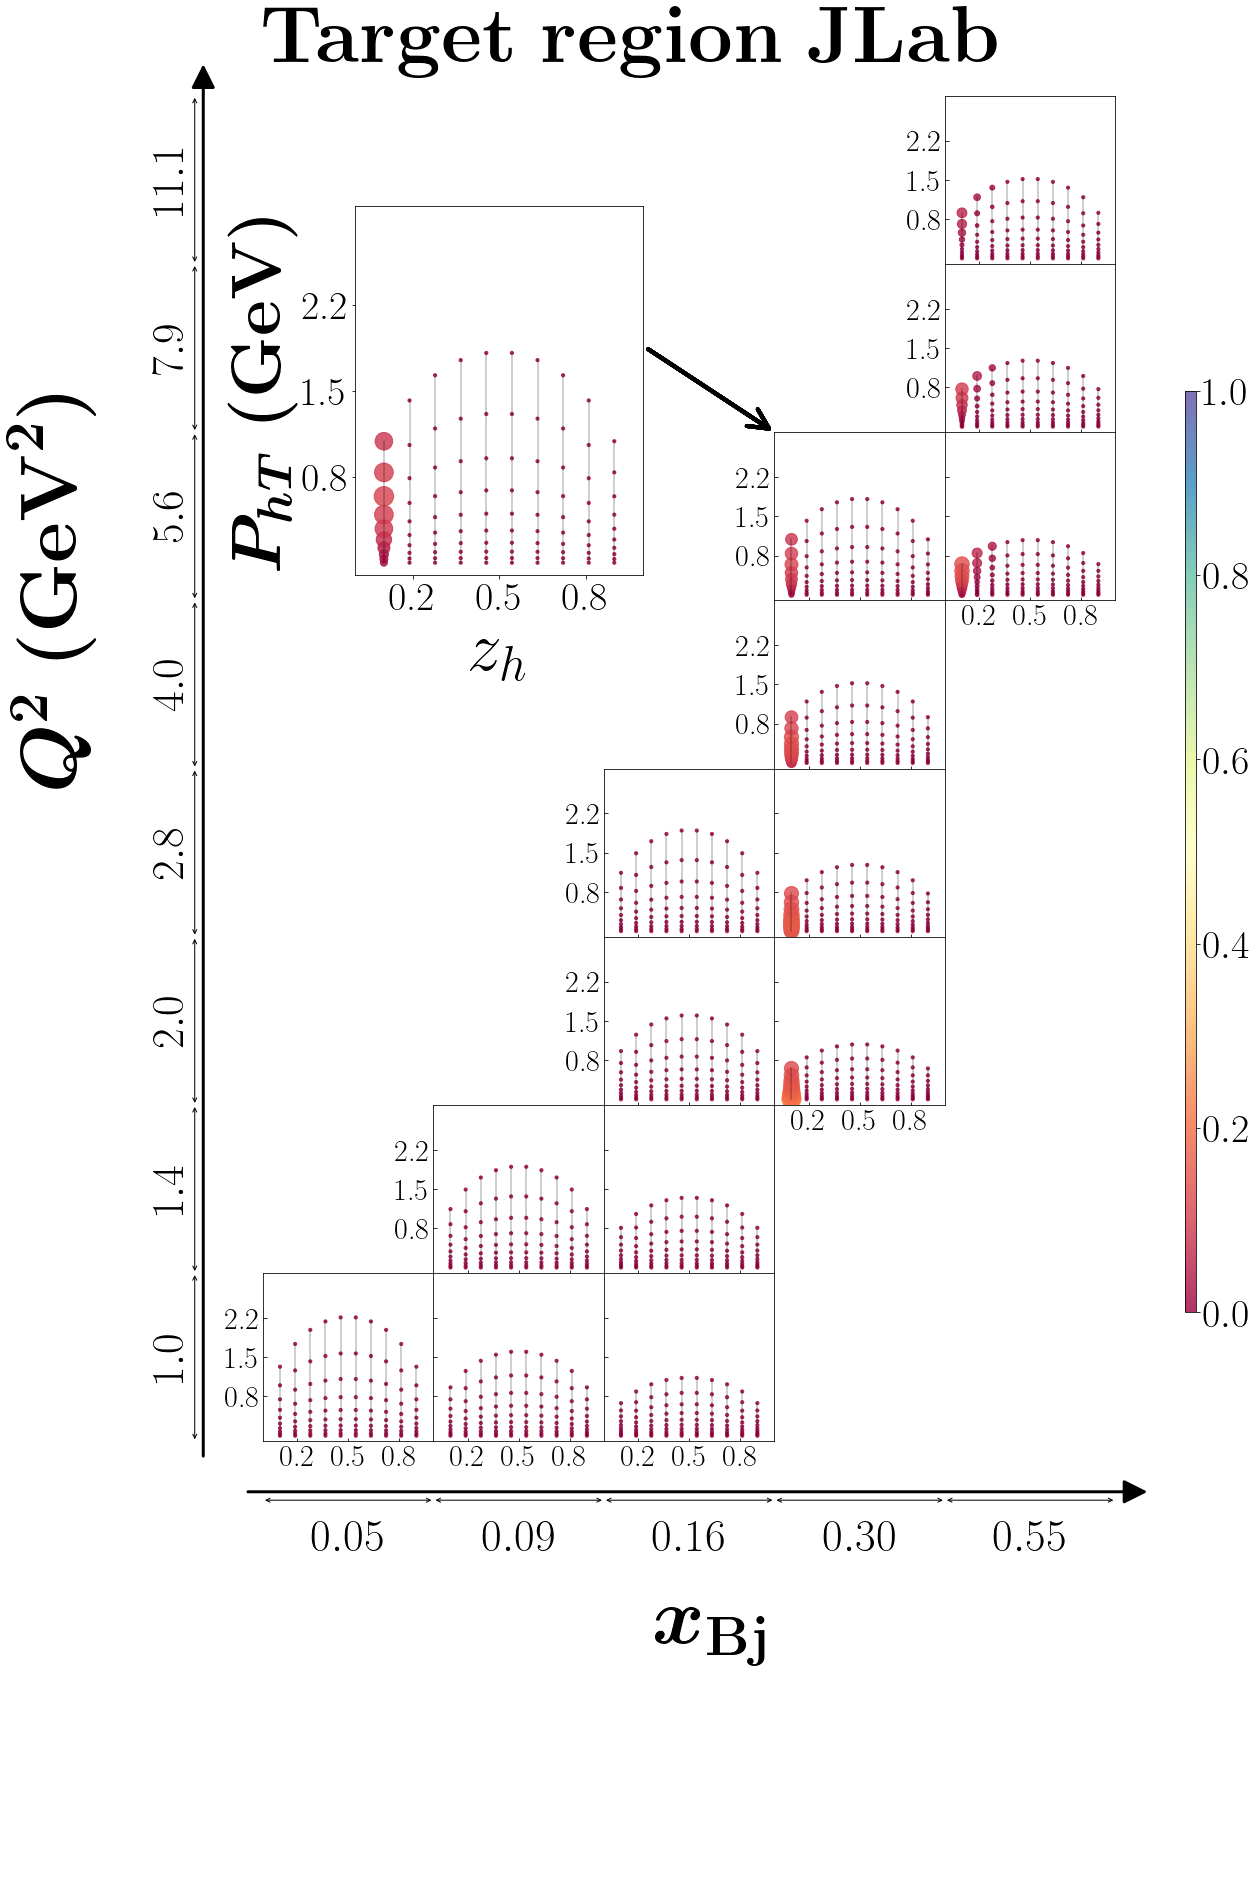

In [30]:
plotJLab12(data ,hadron = 'pi+', affinity = 'targetaff', plotx = 'pT', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

In [31]:
len(data.query("targetaff > 0.01"))

71

### "soft" region 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


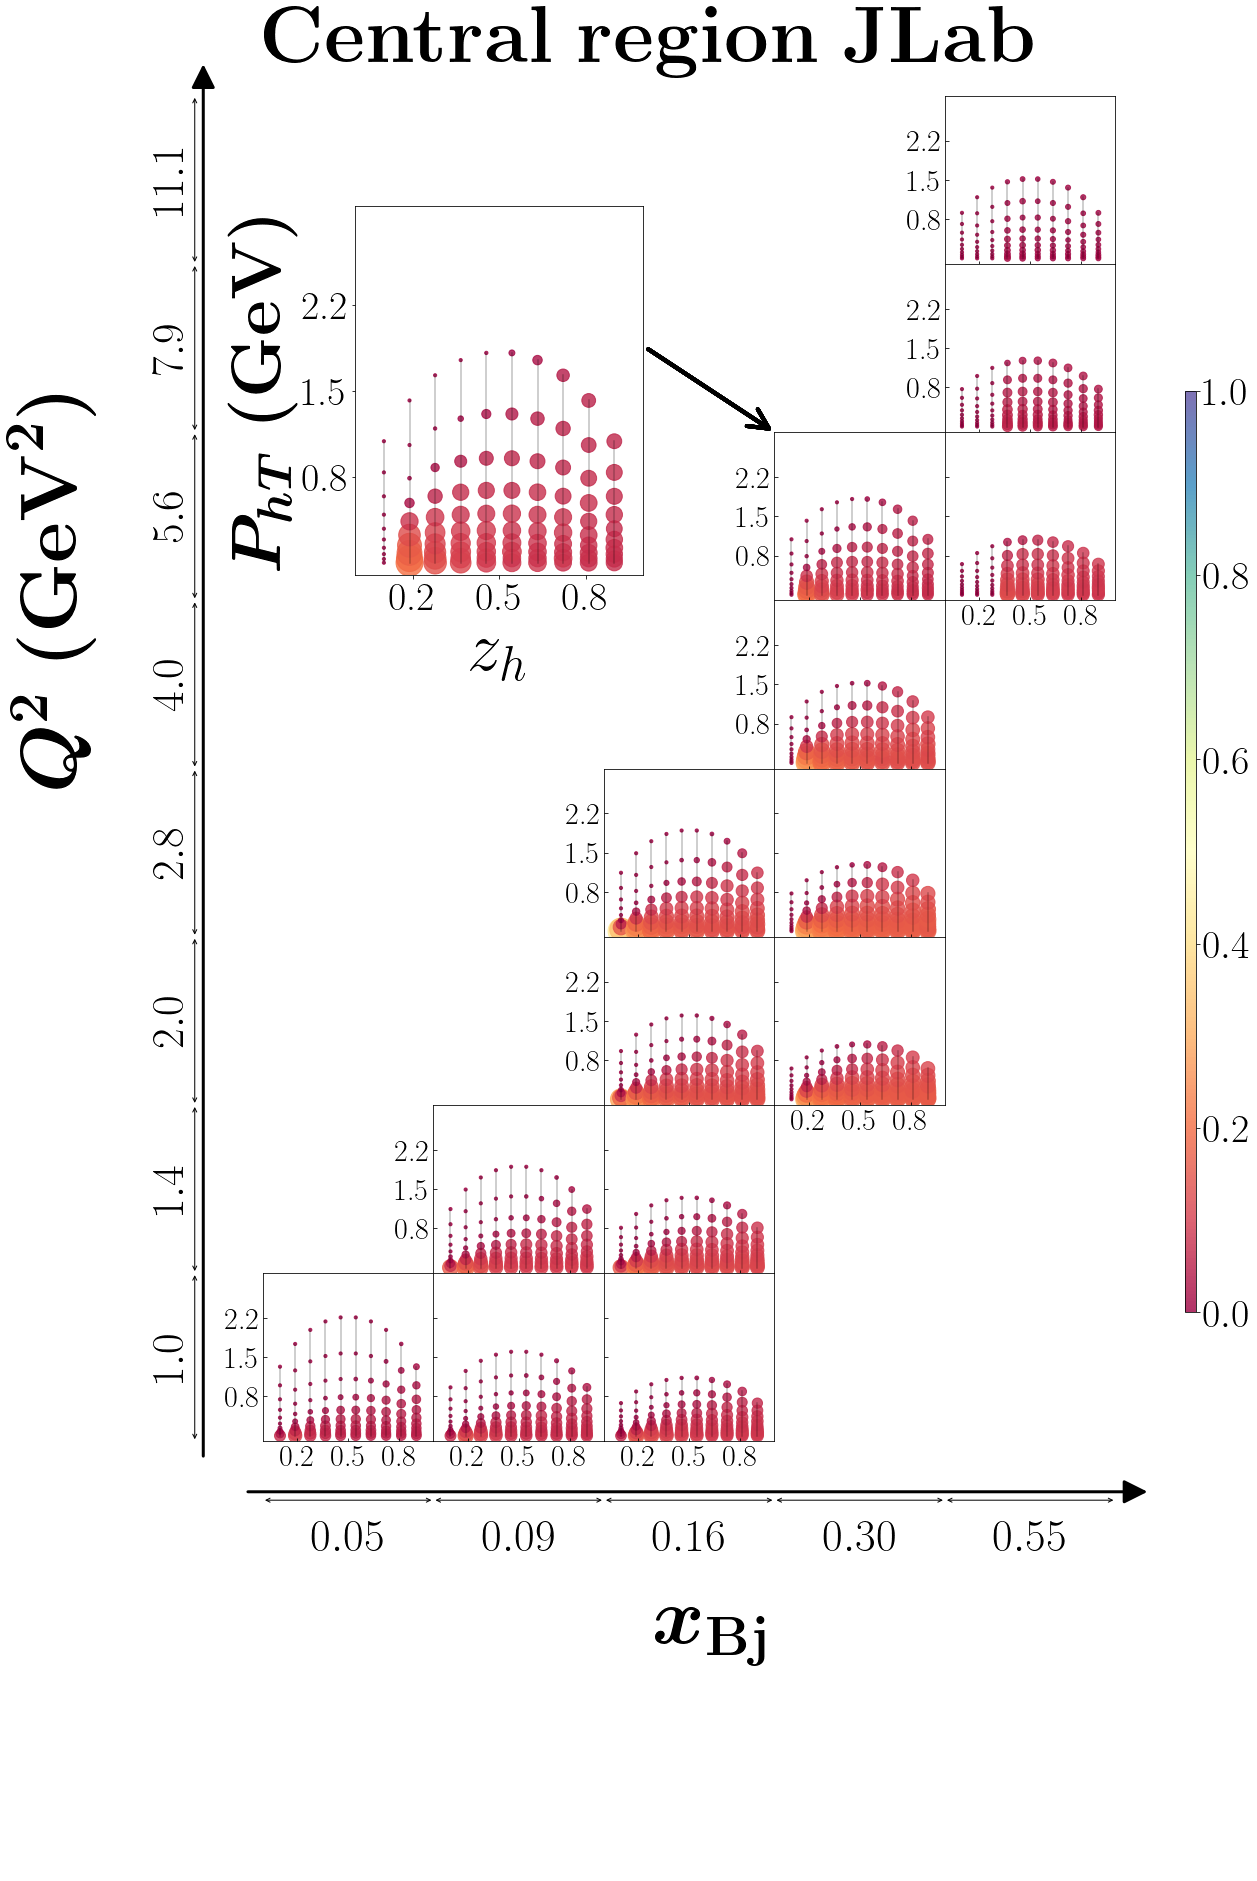

In [32]:
plotJLab12(data ,hadron = 'pi+', affinity = 'softaff', plotx = 'pT', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')

In [33]:
len(data.query("softaff > 0.01"))

1048

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


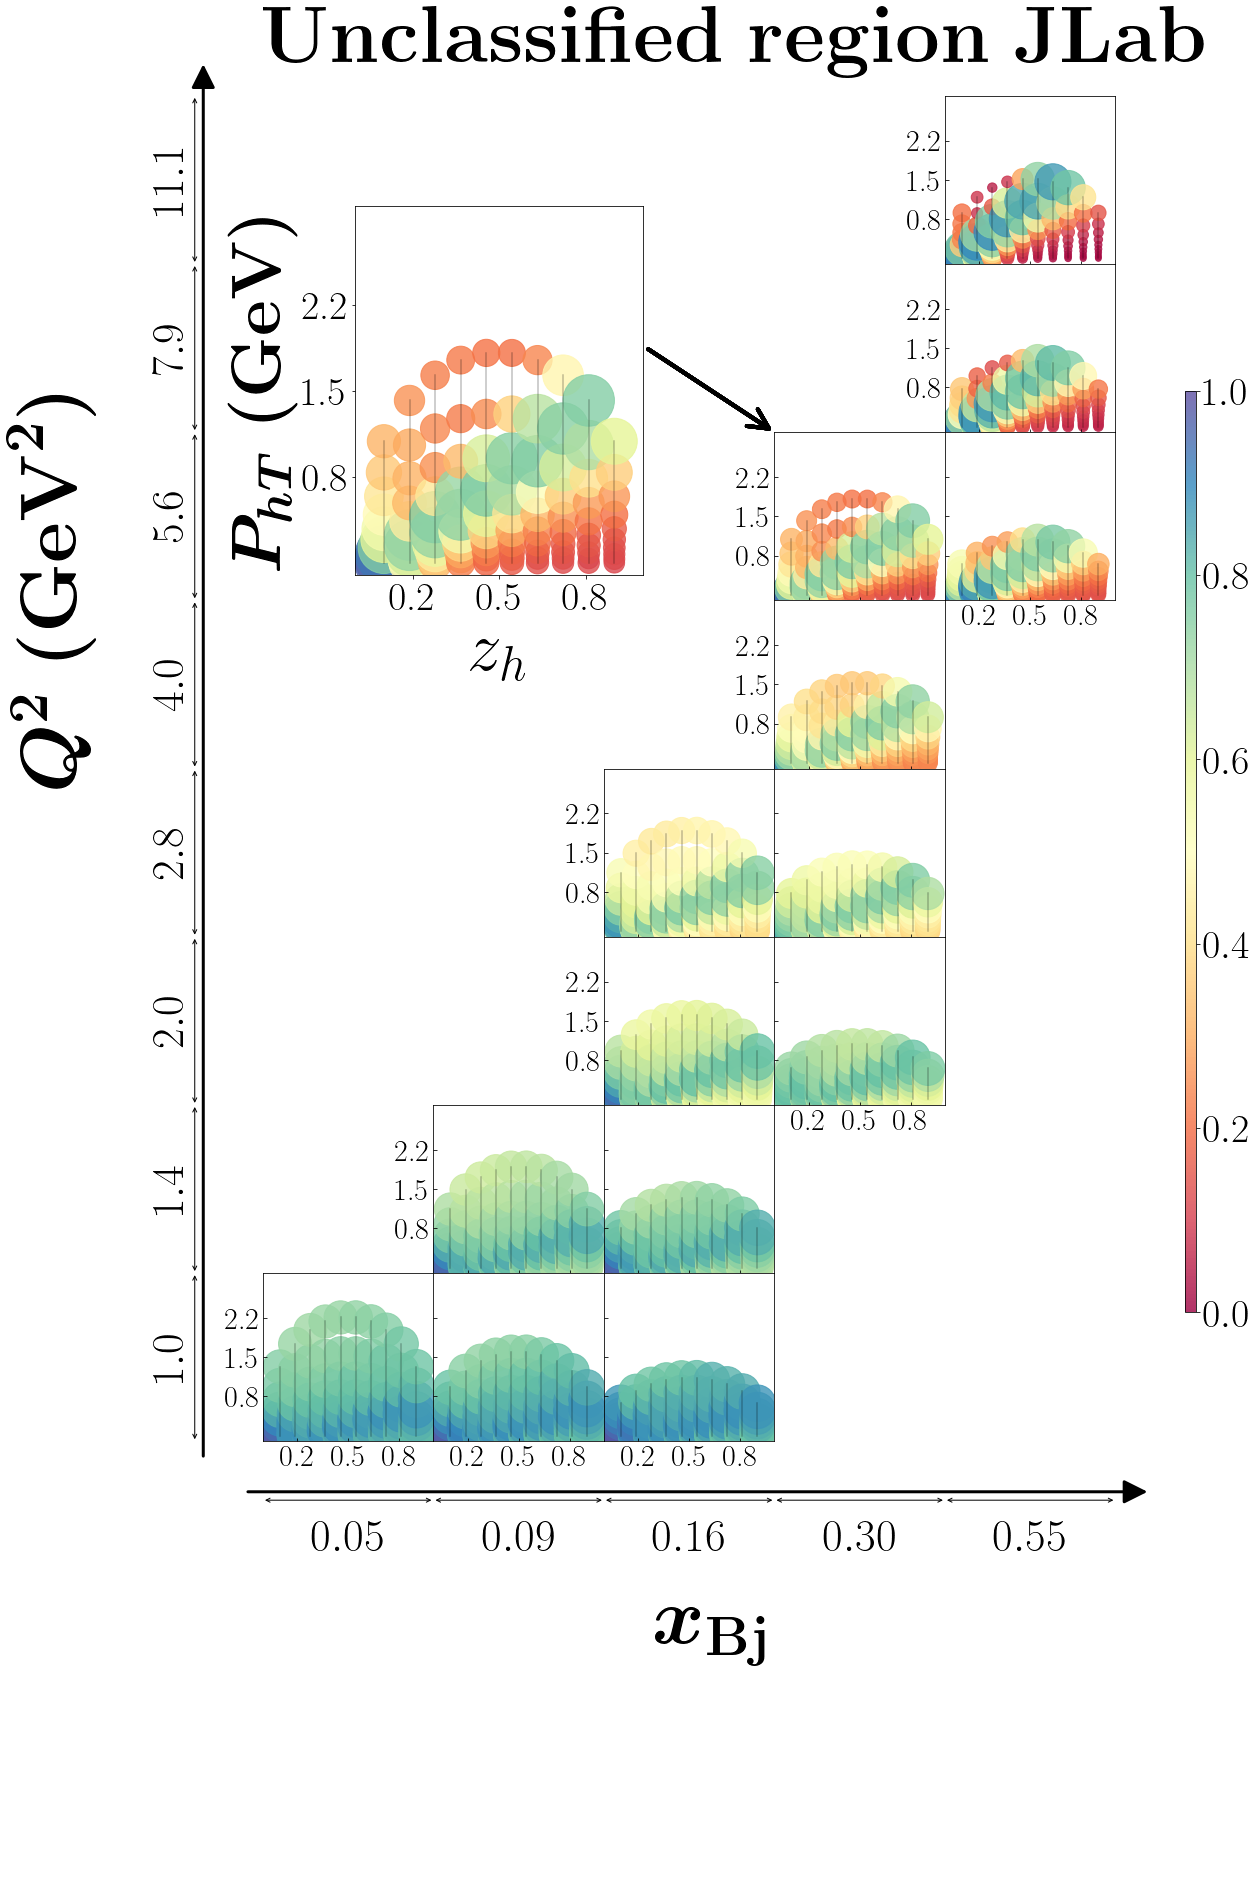

In [34]:
plotJLab12(data ,hadron = 'pi+', affinity = 'unclassifiedaff', plotx = 'pT', ploty = 'z', cmap_name = 'Spectral', yscale = 'linear')